# How to Create Perfect Machine Learning Development Environment With WSL2 on Windows 10/11
## Everything included: terminal, docker, Anaconda, Git, Jupyter Lab, GPU support, ...
![](images/pexels.jpg)

### What is WSL and why do you need it?

That's it. I've had enough. The failed installations, error messages, memes making fun of Windows, people thinking they are cooler because they are using Linux... That ends today by installing a fully-fledged Linux development environment right on top of the supposedly stupid Windows (10/11) using Windows Subsystem For Linux 2 (WSL2).

WSL2 enables you to run a full Linux environment inside Windows. It has a dedicated file system and Linux terminal while also allowing files and services be seamlessly shared with Windows code editors and applications. 

As a machine learning engineer or a data scientists, you will greatly benefit from a Linux environment. You'll find it much easier to install and work with technologies like TensorFlow, PyTorch, or Docker as Linux utilizes system resources more smoothly, especially GPUs.

By the end of this tutorial, you will have a fully-fledged Linux environment, complete with:

- Customized terminal
- VSCode and PyCharm configured as an IDE that uses your Windows settings
- Git, Anaconda, Python, Docker installed
- Jupyter Lab configured with the best extensions
- NVIDIA GPU drivers for CUDA and cuDNN so you can install GPU libraries with a single `pip` statement.

Let's get right into it!

https://ibexorigin.medium.com/membership

### 1. Uninstall existing installation (optional)

Even if you have WSL already installed, I recommend starting from scratch because you may have corrupted your environment, which might prevent us implementing some of the coming steps.

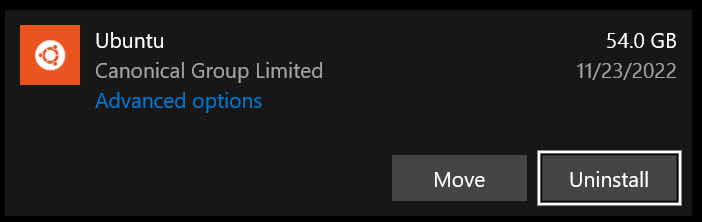

> Your distro might be named differently (Debian, Kali, etc.)

### 2. Install Docker Desktop if you haven't already

Please check that you have Docker Desktop installed on Windows by running `docker --version`. If the version isn't printed, go to this [Docker installation page](https://www.docker.com/products/docker-desktop/) and download/run the executable.

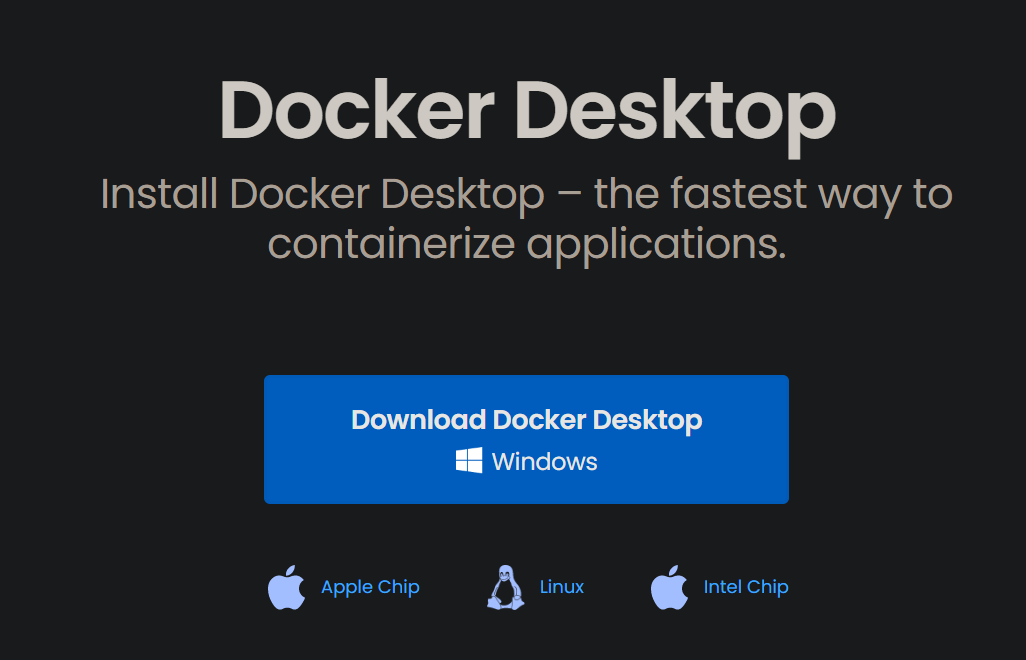

### 3. Check prerequisites

WSL2 requires Windows 10, OS build 19041 or higher or Windows 11. Please check by going to Settings > System > About and scrolling down to Windows specifications. 

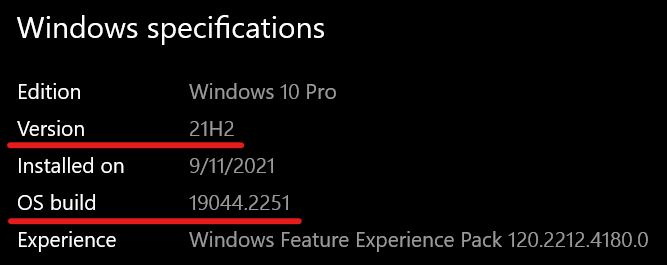

### 4. How to install WSL2

If the prerequisites are met, you need a single command to install WSL2:

```
wsl --install -d Ubuntu
```

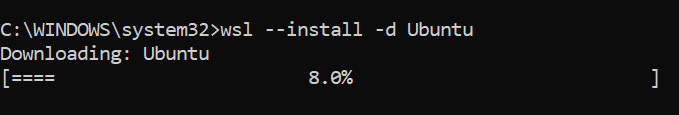

Please run the above command on a Command Line (CMD) that was opened with administrator privileges (right click and choose "Run as administrator").

The `-d` tag of the `wsl` command specifies the Ubuntu distribution, which is the simplest to get started with. To check if the installation was successful, run the `wsl -l -v` command to see the version.

```bash
$ wsl -l -v
  NAME                   STATE           VERSION
* Ubuntu                 Running         2
```

If you think this was easy, hold your judgment. We only started going down the rabbit hole as the most painful part of WSL2 is configuring and setting it up for data science and ML work. 

### 5. Setup a username and account

Once the installation is finished, you will see an application called Ubuntu in the Start menu:

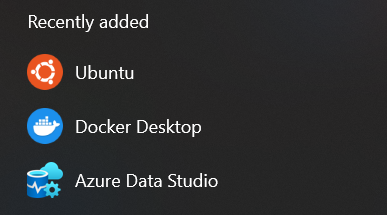

When you open it for the first time, you will encounter the following messages:

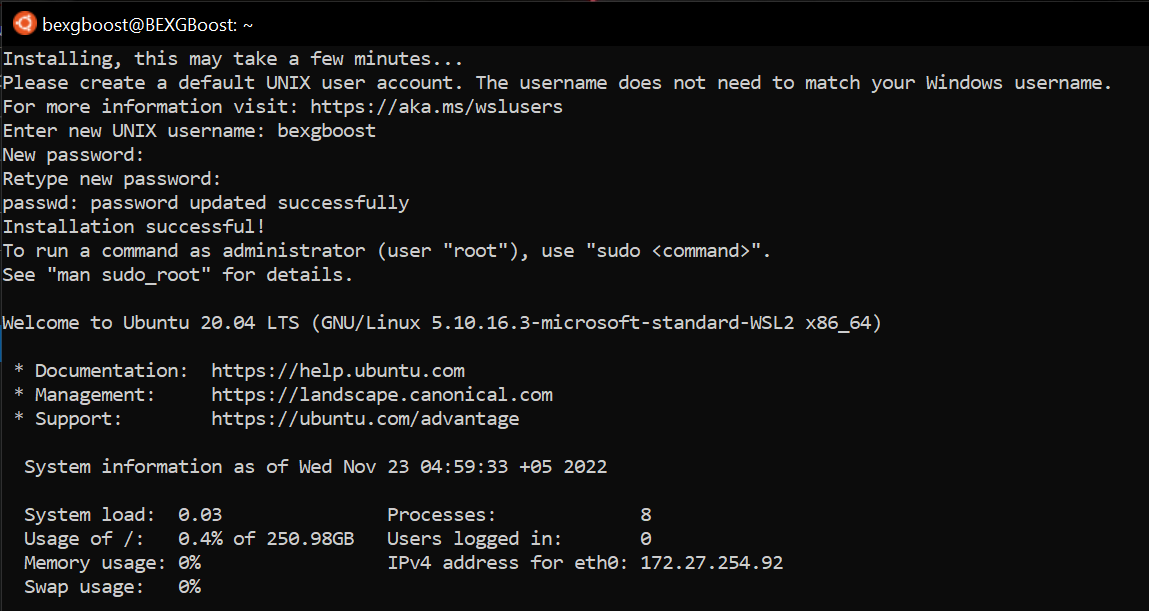

It asks you to create a UNIX user account, which is similar to a Windows user account. I set mine to `bexgboost`, which is different from my Windows username to avoid confusion. But you can set the same password, so that you don't have to remember two.

The `sudo` command is equivalent to running applications as administrator. As you start using Linux terminal, you will see that the `sudo` command can solve many errors, when added before commands.

For the rest of the tutorial, we will be using both Windows and WSL2 terminal. I will refer to them as "the CMD" for Windows and "the terminal" for WSL2. 

### 6. How to update and upgrade packages on WSL2

When you use Linux, you should update its packages regularly after new library installs or version changes. Here are the commands to do it:

`sudo apt update && sudo apt upgrade`

These commands are similar to Windows Update but much faster. The `update` command downloads new library/package changes while the `upgrade` command implements them.

If you are completely new to Linux, check out these [most-frequently used terminal commands](https://www.digitalocean.com/community/tutorials/linux-commands) so you can follow along the rest of the article more easily.

### 7. Understanding the file system in WSL2

An operating system consists of files/applications and graphical user interfaces to interact with them. In Windows, you use either the CMD or the File explorer. In WSL2, you will mainly use the terminal to interact with everything.

WSL2 doesn't come with GUI (Windows 11 now comes with GUI, check [here](https://learn.microsoft.com/en-us/windows/wsl/tutorials/gui-apps)). This might seem like a limitation at first, but working through the terminal is much faster, offers a lot of flexibility, and makes you look like a hacker.

WSL2 can be thought of as a Linux file system mounted on top of Windows. Its installation folder can be found in the network path `\\wsl$\Ubuntu`. To open it in the terminal, type `cd /`. When you run `ls` which lists the directories contents, you will see many directories.

```bash
$ ls
bin   dev  home  lib    lib64   lost+found  mnt  proc  run   snap  sys  usr
boot  etc  init  lib32  libx32  media       opt  root  sbin  srv   tmp  var
```

We are only interested in two of them: `home` and `mnt`. `home` contains your UNIX account information. Right now, there is only one directory in it named under your UNIX username (mine is `/home/bexgboost`). Every time you start a new terminal session, the path is set to that folder. That's why `/home/username` is called the home directory. 

> The forward slash `/` is important. 

When you change directories, you can go back home by calling `cd` without arguments or refer to it with `~`.

The `/mnt` folder contains links to the C and D drives of Windows. Before WSL, I used to store my projects and code on the Desktop. Here is the command to copy them into home:

```
cp /mnt/users/bex/Desktop/* .
```

> `cp` stands for "copy". `bex` is my windows username.

Now, when I run `ls` inside the home directory, I can see duplicates of my Windows files inside WSL2.

```
$ ls

articles  courses  homework  kaggle_comp  learn_code  projects  strimlitbook  tricking-data-science
```

Even though WSL2 is a Linux file system, you can open its directories with Windows explorer. Inside any directory, run the `explorer.exe .` command. Below, we are opening the home directory:

![](images/file_explorer.gif)

So, as a summary, the two most important directories of WSL2 is the `mnt` and `home`. While you can access the C and D disks of Windows from `mnt`, the home directory is the `/home/username`.

### 8. How to install Visual Studio Code for WSL2

I mentioned that GUI applications aren't generally available for WSL2. However, there is an exception for VSCode. You can open any WSL2 folder as a VSCode project via a single command.

To do so, you must have VSCode installed on your Windows. Then, to link WSL2 to VSCode, you have to install the [Remote Extension Development Pack](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.vscode-remote-extensionpack) extension and relaunch VSCode if you have it open. 

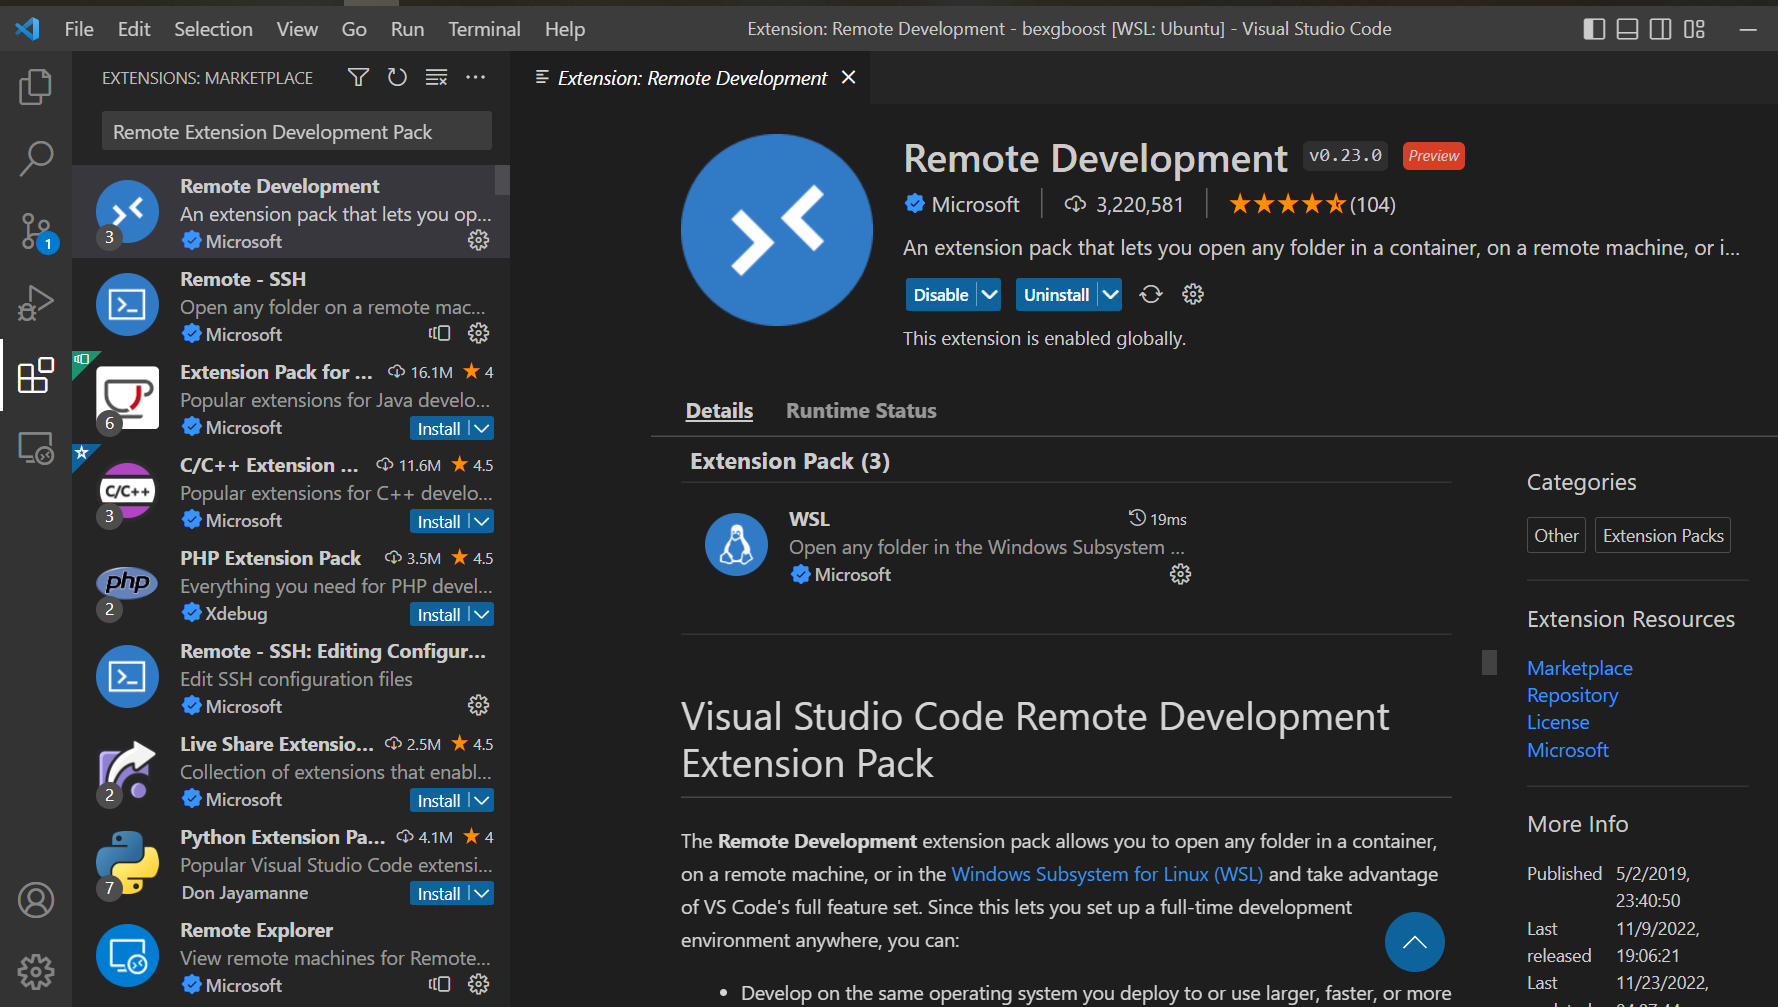

Then, go to the terminal and update/upgrade packages with `sudo apt update && sudo apt upgrade`. Then, change into any directory and run `code .` to open a VSCode project for the folder.

![](images/vscode.gif)

Above, I opened the home directory with VSCode. The best thing about this method is that you don't have two separate VSCode versions. All the settings and extensions of your Windows VSCode installation will apply to WSL2 folders as well.

### 9. How to install and set up Git for WSL2

The next step is installing Git, as it is the universal code version control system. First, check if it isn't already installed with `git --version` as WSL2 might already include Git in its installation in future versions. If the terminal says "git: command not found", run `sudo apt-get install git` to install it.

It will probably ask your password and once finished, you can run `git --version` once again to check if the installation was successful.

Finally, set up your `Git` credentials by running the following commands:

```
$ git config --global user.name "Your Name"
$ git config --global user.email "youremail@domain.com"

```

Right now, you cannot push your changes to remote repositories. This has something to do with the Git Credentials Manager (GCM). I won't go into the detail of what it is and why you need it. Instead, I will just write the commands to execute to set it up for WSL2. If you want to learn more about it, read the section on [Git for WSL2](https://learn.microsoft.com/en-us/windows/wsl/tutorials/wsl-git) from Microsoft docs.

On CMD, run `git update-git-for-windows`. Then, on the Ubuntu terminal, run the following command:

```
git config --global credential.helper "/mnt/c/Program\ Files/Git/mingw64/bin/git-credential-manager-core.exe"
```

This enables you to push commits to new or existing Git repositories that you copied from Windows into Linux. 

### 10. How to install Docker for WSL2

This step is very easy as we've already installed Docker in the beginning. To link Docker Desktop to WSL2, go to Docker Desktop > Settings > Resources> WSL integration and toggle the Ubuntu button to 'on'. Then, press Apply & restart, restart the terminal for the changes to take effect.

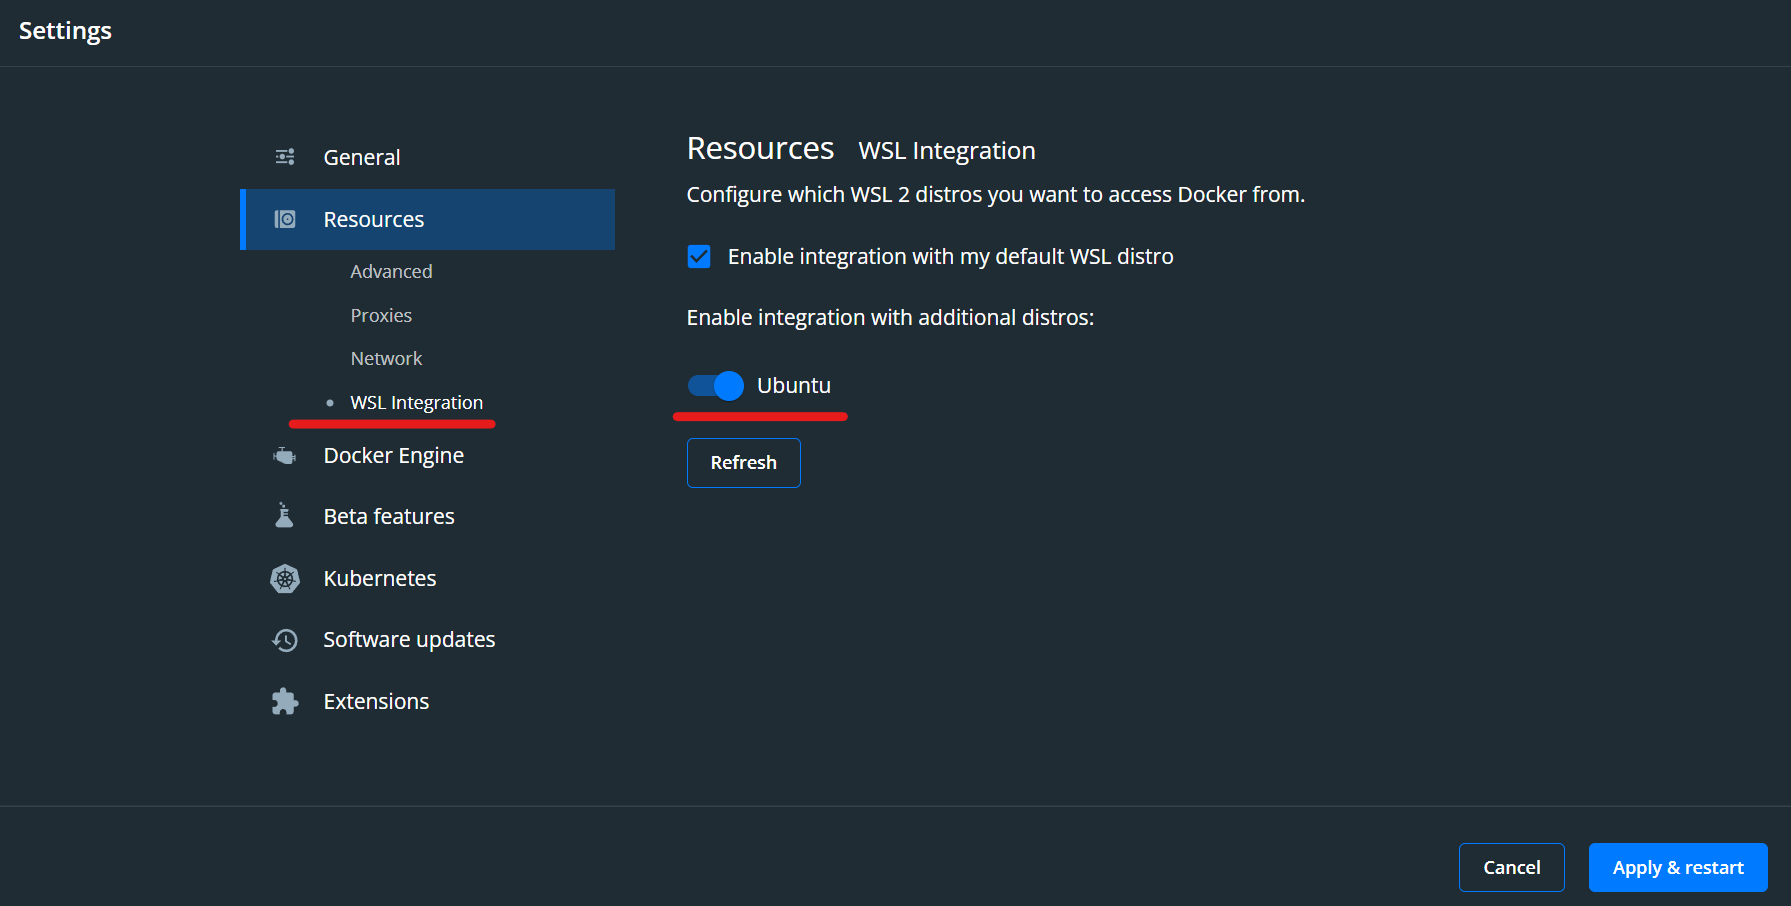

Afterwards, you should be able to run `docker --version` successfully on WSL2 terminal.

### 11. How to install Anaconda on WSL2

Now, we have to install Python and a package manager. I prefer to do both through Anaconda. (Go to the end of this step to see a regular Python install without Anaconda).

The first step is to go to https://www.anaconda.com/products/distribution and download the 64-bit installer for Linux. 
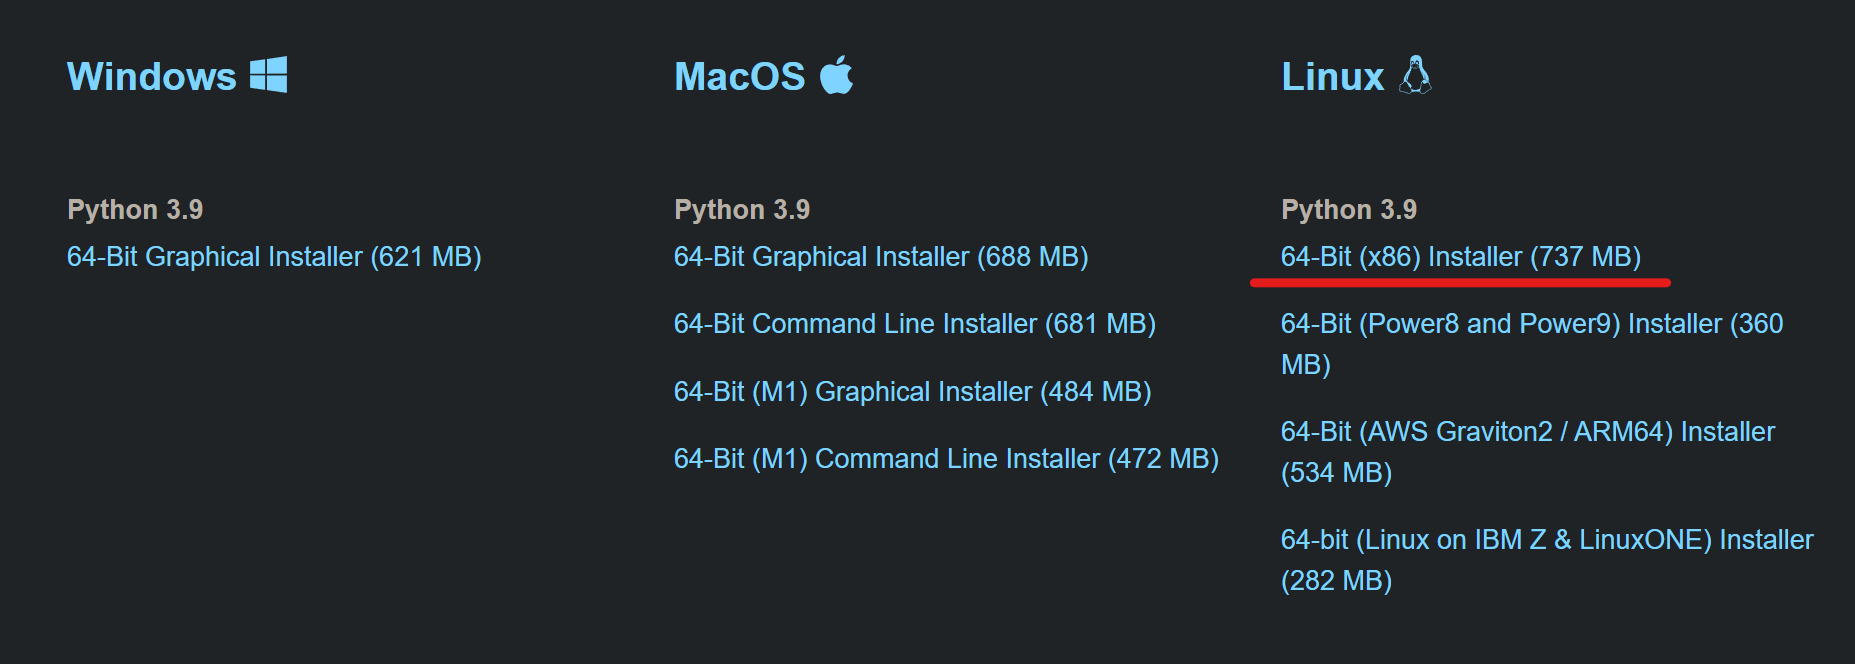

However, Linux files are not like Windows `.exe` executables. They have the .sh extension as you might discover if you press on the download link.

Since we said Linux doesn't have GUI to install apps, we will use the terminal to download and install the Anaconda executable for Linux. First, copy the download link and go to the terminal.

Type `wget` and paste the download link next to it (do this step in the home directory). Here is how it looks for the download link I copied:


```
$ wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
```

`wget` is an awesome CLI tool to download any file with a URL. The above command will download a file called `Anaconda3-2022.10-Linux-x86_64.sh`. You can check it by running `ls`.

To install the file, use the `bash` command with the filename:

```
$ bash Anaconda3-2022.10-Linux-x86_64.sh
```

Press ENTER half a million times to read the installation instructions and it will ask two yes/no questions. Answer yes both times and you will have both Python and Anaconda installed. 

To check the installation, you can run `conda --version` or `which python`:

```bash
$ conda --version
conda 22.9.0

$ which python
/home/bexgboost/anaconda3/bin/python
```

The output shows Anaconda is installed under the `anaconda3` directory in the root directory. All the future environments and packages will be within that folder.

After the installation, remove the Anaconda executable:

```
$ rm -rf Anaconda3-2022.10-Linux-x86_64.sh
```

If you don't want to use Anaconda, here is how to install Python, pip and venv with the following commands:

```
$ sudo apt update && upgrade
$ sudo apt install python3 python3-pip python3-venv ipython3

```

### 12. How to install Jupyter Lab on WSL2

Now, the best part - installing Jupyter Lab, the crowned jewel of IDEs for data scientists. In the base environment, run `pip install jupyterlab`.

Installing Jupyter Lab and its extensions inside the base environment will make it available to all future conda environments and won't require separate setups.

To open a Jupyter Lab session, run `jupyter lab --no-browser` inside the desired directory. The reason we are adding the `--no-browser` tab is that WSL2 doesn't have a browser installed with a GUI. You will have to open the session manually by copying the link at the end with the token and open it in any browser you like. 



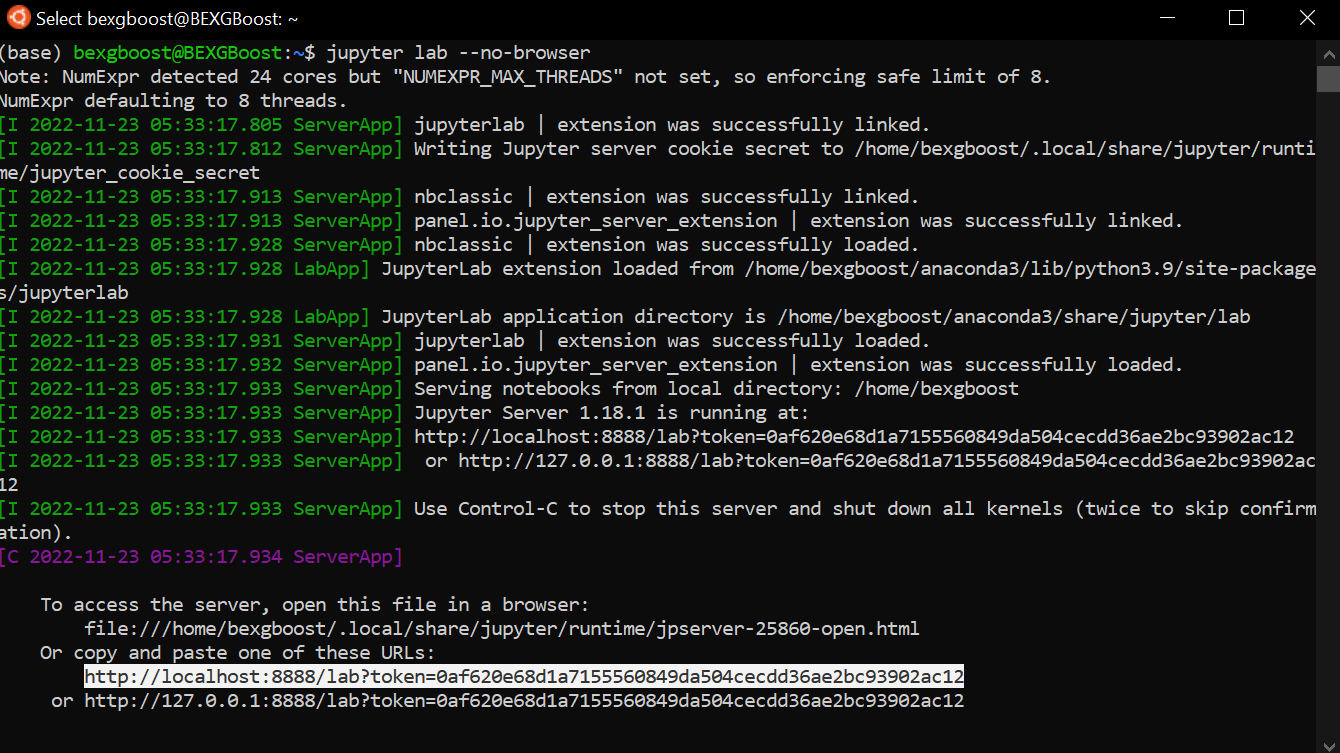

When you launch Jupyter Lab, you will see that any of your conda environments won't be available in the Launcher. To add existing (or new) conda envs to Jupyter Lab, use the following commands:

```
# Create a new env
$ conda create -n new_env -y

# Install ipykernel and add the env
$ pip install ipykernel
$ ipython kernel install --user --name=new_env
```

Once you restart your Jupyter Lab session, the env will be available in the Launcher.

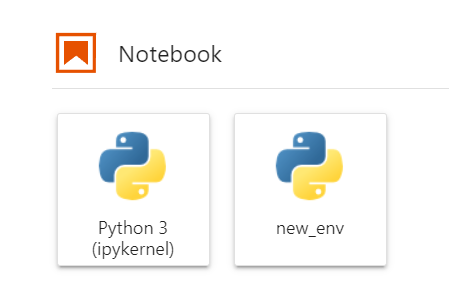

To remove a conda environment from Jupyter Lab, you can run the below command:

```
$ jupyter kernelspec uninstall env_name
```

### 13. How to install spellchecker and code formatter for Jupyter Lab (optional)

My two favorite extensions for Jupyter Lab is a spellchecker and a code formatter. To install them, run the below commands inside the base environment:

```
pip install jupyterlab-spellchecker
pip install jupyterlab-code-formatter
pip install black isort
```

Once installed, misspelled words in Markdown cells will be marked red and there will be a new icon to format the code. You can configure both extensions to run on each save in the Advanced Settings Editor.

![](images/extensions.gif)

### 14. How to format the WSL2 terminal (optional)

Right now, the Ubuntu terminal looks very ugly:

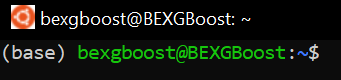

Yours might be worse than mine as I've already done some tinkering around. To format the terminal prompt, open the home directory with VSCode by typing `code ~` and open the file called `.bashrc`.

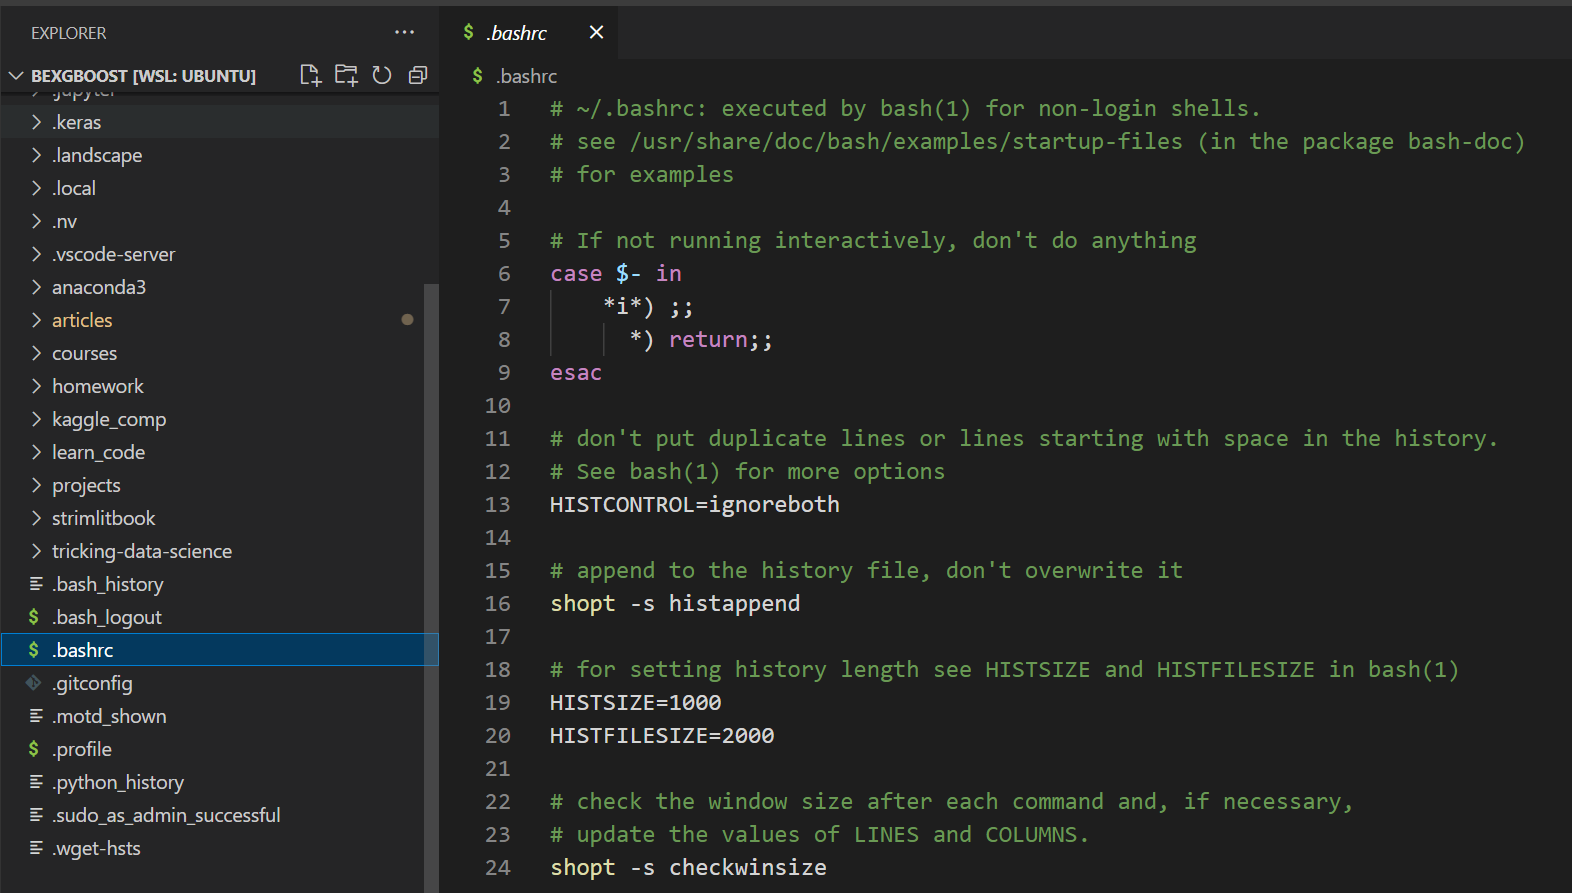

Scroll down to the end of the file and paste the code from this [gist](https://gist.github.com/BexTuychiev/65dc419af0efa723fc78e269a286ec52). In line 1, replace `WSL2 Bash` with whatever you want for the window tile and in line 4, where it says `bash@bexgboost`, replace `bexgboost` with your own username.

Save/close the file and close VSCode. To apply the changes, run `source .bashrc` in the root directory:

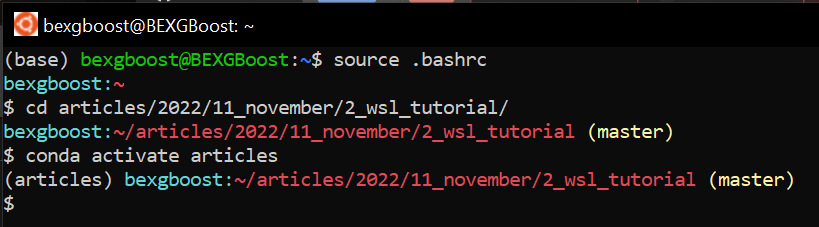

As you can see, the new prompt looks much nicer. It shows the path, prompt name, git branch name in different colors and always starts the prompt with a new line. These settings will still have effect every time you open the terminal.

If you look at the end of the gist, you will see that I added a few aliases for my most commonly-used commands. For example, `g` is short for `git`, `jl` for `jupyter lab --no-browser`, `gcb` to create a new branch and check it out and so on. You can always edit the `.bashrc` file to add your own aliases. 

To change the format of the prompt or understand the code behind it, you can read [this](https://phoenixnap.com/kb/change-bash-prompt-linux) excellent guide. 

### 15. How to add WSL2 Linux terminal as a PyCharm builtin terminal (optional)

My beloved IDE after Jupyter Lab is PyCharm Professional. Since PyCharm is installed only on Windows, it is linked to CMD or Git Bash for its built-in terminal. To use the WSL2 Ubuntu terminal, go to Settings > Tools > Terminal > Shell path and paste `wsl.exe --distribution Ubuntu`. Then, close any terminal tabs and reopen them to have the Ubuntu terminal linked to PyCharm.

Then, to open any WSL2 folder as a PyCharm project, open that folder with `explorer.exe .` and select the "Open folder as a PyCharm project" option from the context menu. PyCharm supports WSL2 on Windows by default and will recognize its folders.

![](images/change_terminal.gif)

### 16. How to install NVIDIA CUDA and cuDNN drivers on WSL2 (works 100%)

The final and hardest step is installing GPU support for WSL2. For this step to work, you should already have CUDA and cuDNN drivers installed for your NVIDIA GPU and should be able to run libraries like TensorFlow with GPU support without any errors.

If you can't run TensorFlow with GPU on Windows, first, follow this article I've written for installing TensorFlow with GPU support:

https://towardsdatascience.com/how-to-finally-install-tensorflow-gpu-on-windows-10-63527910f255

The guide will teach you to install CUDA 11.2 and cuDNN 8.1 drivers/libraries on your Windows system. We are choosing 11.2 and 8.1 versions for CUDA and cuDNN, because those are the versions required for TensorFlow v. 2.6+. After following the tutorial, open the Ubuntu terminal and update/upgrade:

```
$ sudo apt update && sudo apt upgrade
```

Then, run the below commands in the root path one-by-one with the utmost attention because if you mess them up, it might corrupt your whole WSL2 installation and you may have to start from scratch.

```bash
$ sudo apt-key del 7fa2af80
$ sudo apt update && sudo apt upgrade
$ wget https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/cuda-wsl-ubuntu.pin
$ sudo mv cuda-wsl-ubuntu.pin /etc/apt/preferences.d/cuda-repository-pin-600
$ sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
$ sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64/7fa2af80.pub
$ sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/ /"
$ sudo apt-get update
$ sudo apt-get -y install cuda
$ sudo apt update && sudo apt upgrade
```

Those commands will take some time to install the CUDA drivers. Now, onto the cuDNN drivers:

```bash
$ sudo apt-get install libcudnn8
$ sudo apt-get install libcudnn8-dev
$ sudo apt-get update && sudo apt-get upgrade
```

Finally, run the below commands to clean up the root directory because we downloaded some files:

```bash
$ rm -rf cuda-keyring_1.0-1_all.deb
$ rm -rf cuda-repo-wsl-ubuntu-11-2-local_11.2.0-1_amd64.deb
$ rm -rf cuda_11.2.0_460.27.04_linux.run
```

To check that GPU support is properly working, install TensorFlow 2.10 inside a new conda env. Here are the commands:

```
$ conda create -n tf python=3.9 -y
$ conda activate tf
$ pip install tensorflow==2.10
$ python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
```

If you get the `[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]`, output, congratulations! You have a fully-fledged Linux environment with a GPU support!

### Conclusion

If you wanted to run Linux inside Windows in the past, you had to use complex technologies like VirtualMachine, or Vagrant that would leave you hating both Linux and Windows and ultimately drive you to buying an expensive Mac (which might be worth it, they say). Now, you can have the double benefits of both Windows and Linux with a single command with Windows Subsystem Linux (WSL2).

Thank you for reading!

Useful resources:

- [Another complete WSL2 tutorial by SitePoint](https://www.sitepoint.com/wsl2/)
- [Complete VSCode guide for WSL2](https://code.visualstudio.com/docs/remote/wsl-tutorial)
- [Running Linux GUI apps for Windows 11](https://docs.microsoft.com/en-us/windows/wsl/tutorials/gui-apps)